# **Convolutional Neural Networks**

In [1]:
import tensorflow.keras as keras
import pandas as pd

# Load in our data from CSV files
train_df = pd.read_csv("asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("asl_data/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate out our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

In [11]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [6]:
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [4]:
%load_ext tensorboard
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'])

logdir = "logs/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model.fit(x_train,
          y_train,
          batch_size=1,
          epochs=1,
          callbacks=[tensorboard_callback])

%tensorboard --logdir logs/


27455/27455 [==============================] - 199s 7ms/step - loss: 0.2638 - accuracy: 0.9289


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [4]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

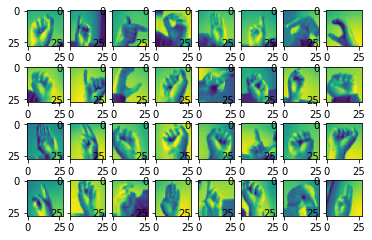

In [27]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [24]:
x, y  = img_iter.next()

In [25]:
y

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 

In [22]:
datagen.fit(x_train)

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(img_iter,
          epochs=20,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/20
857/857 [==============================] - 84s 95ms/step - loss: 1.1556 - accuracy: 0.6284 - val_loss: 0.3241 - val_accuracy: 0.8848
Epoch 2/20
857/857 [==============================] - 84s 98ms/step - loss: 0.3391 - accuracy: 0.8845 - val_loss: 0.8107 - val_accuracy: 0.7479
Epoch 3/20
857/857 [==============================] - 82s 95ms/step - loss: 0.2072 - accuracy: 0.9313 - val_loss: 0.3032 - val_accuracy: 0.8963
Epoch 4/20
857/857 [==============================] - 82s 96ms/step - loss: 0.1510 - accuracy: 0.9508 - val_loss: 0.4333 - val_accuracy: 0.8728
Epoch 5/20
857/857 [==============================] - 79s 92ms/step - loss: 0.1268 - accuracy: 0.9583 - val_loss: 0.2567 - val_accuracy: 0.9133
Epoch 6/20
 63/857 [=>............................] - ETA: 1:09 - loss: 0.1399 - accuracy: 0.9559

KeyboardInterrupt: 

In [ ]:
model.save('asl_model')

In [10]:
model = keras.models.load_model('asl_model')


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0

In [14]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 75) dtype=float32, numpy=
 array([[[[ 2.15876587e-02,  7.98756257e-02, -7.90111646e-02,
           -7.47052431e-02, -9.57044810e-02, -2.78701596e-02,
           -8.93427059e-02,  6.91417651e-03,  5.29700071e-02,
           -3.46166305e-02,  2.62781940e-02,  5.66922501e-02,
            1.69531964e-02,  1.77692950e-01,  1.78099141e-01,
            1.22277856e-01, -1.75771508e-02,  3.01632285e-02,
            4.14153263e-02, -1.97354015e-02, -1.62684061e-02,
           -2.00844482e-01,  1.53910473e-01,  9.07171052e-05,
           -2.14585923e-02, -1.04900807e-01, -2.70764362e-02,
            4.21123840e-02,  1.24072216e-01,  5.67515753e-03,
           -9.89067182e-02, -1.93027556e-02, -7.26574734e-02,
           -1.06637843e-01,  1.14963956e-01, -1.84377041e-02,
           -7.52457976e-02, -4.96901423e-02, -4.96665947e-02,
            1.73852909e-02, -1.43197417e-01, -1.15960829e-01,
           -7.86550418e-02, -5.72270453e-02, -6.94180652e-

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

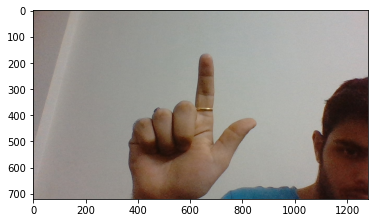

In [16]:
show_image('WIN_20210923_20_49_04_Pro.jpg')

In [50]:
from tensorflow.keras.preprocessing import image as image_utils
from PIL import Image,ImageOps
def load_and_scale_image(image_path):
   
 
    # Opens a image in RGB mode
#     im = Image.open(image_path)

    # Size of the image in pixels (size of original image)
    # (This is not mandatory)
#     width, height = im.size

#     # Setting the points for cropped image
#     left = width / 2 - 94
#     top = height / 2 + 93
#     right =  width / 2 + 94
#     bottom = height / 2 - 93

    # Cropped image of above dimension
    # (It will not change original image)
    # im1 = im.crop((left, top, right, bottom))
#     newsize = (188,186)
#     im1 = im.resize(newsize)
#     im1 = ImageOps.grayscale(im1)
    # Shows the image in image viewer
#     im1.show()
#     
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image

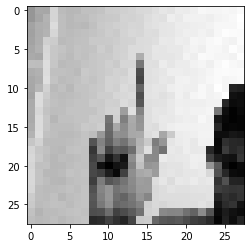

In [51]:
image = load_and_scale_image('WIN_20210923_20_49_04_Pro.jpg')
plt.imshow(image, cmap='gray')

In [52]:
image = image_utils.img_to_array(image)

In [53]:
image = image.reshape(1,28,28,1) 

In [21]:
image = image / 255

In [22]:
prediction = model.predict(image)
print(prediction)

[[1.3501211e-10 7.1286191e-14 3.2778393e-09 1.9785123e-06 1.1580566e-12
  1.7978344e-10 1.9211206e-03 4.6120062e-05 7.0509380e-01 2.1960840e-01
  1.8007381e-02 2.3912105e-03 1.4972127e-06 1.6951618e-12 1.8607127e-05
  4.1991652e-06 4.1433031e-04 2.8177039e-05 4.7067570e-05 5.0703602e-06
  3.8530990e-02 4.7804531e-07 1.1115285e-03 1.2768025e-02]]


In [23]:
np.argmax(prediction)

8

In [24]:
alphabet = "abcdefghiklmnopqrstuvwxy"
dictionary = {}
for i in range(24):
    dictionary[i] = alphabet[i]
dictionary

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'k',
 10: 'l',
 11: 'm',
 12: 'n',
 13: 'o',
 14: 'p',
 15: 'q',
 16: 'r',
 17: 's',
 18: 't',
 19: 'u',
 20: 'v',
 21: 'w',
 22: 'x',
 23: 'y'}

In [54]:
def predict_letter(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,28,28,1) 
    image = image/255
    prediction = model.predict(image)
    # convert prediction to letter
    predicted_letter = dictionary[np.argmax(prediction)]
    return predicted_letter

'e'

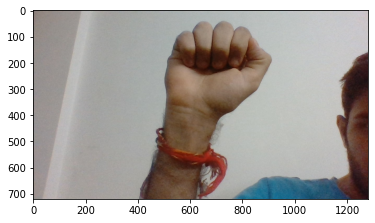

In [58]:
predict_letter("WIN_20210923_20_55_36_Pro.jpg")

'a'

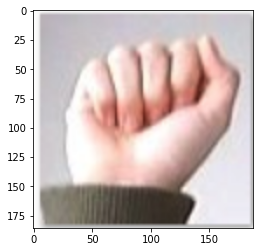

In [56]:
predict_letter("test.png")

In [33]:
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open(r"WIN_20210923_20_49_04_Pro.jpg")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = width / 2 - 94
top = height / 2 + 93
right =  width / 2 + 94
bottom = height / 2 - 93
 
# Cropped image of above dimension
# (It will not change original image)
# im1 = im.crop((left, top, right, bottom))
newsize = (188,186)
im1 = im.resize(newsize)
# Shows the image in image viewer
im1.show()

In [38]:
image_utils.img_to_array(im1)

array([[[124., 110., 102.],
        [125., 109., 105.],
        [129., 111., 109.],
        ...,
        [191., 181., 182.],
        [191., 181., 181.],
        [191., 181., 181.]],

       [[124., 111., 101.],
        [126., 111., 104.],
        [130., 112., 106.],
        ...,
        [192., 183., 186.],
        [192., 181., 182.],
        [191., 181., 182.]],

       [[122., 110.,  98.],
        [127., 114., 105.],
        [132., 115., 108.],
        ...,
        [190., 182., 185.],
        [191., 181., 182.],
        [191., 181., 182.]],

       ...,

       [[155., 146., 147.],
        [153., 145., 143.],
        [154., 145., 140.],
        ...,
        [ 79.,  33.,  28.],
        [ 86.,  41.,  35.],
        [ 97.,  49.,  43.]],

       [[153., 145., 145.],
        [154., 146., 143.],
        [153., 144., 142.],
        ...,
        [ 69.,  27.,  22.],
        [ 81.,  34.,  28.],
        [ 91.,  39.,  30.]],

       [[155., 145., 143.],
        [155., 146., 142.],
        [153., 1

TypeError: expected str, bytes or os.PathLike object, not Image

In [60]:
from IPython.display import clear_output, Image, display, HTML
import numpy as np    

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [61]:
show_graph(tf.get_default_graph().as_graph_def())

NameError: name 'tf' is not defined